In [34]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

from jaxkineticmodel.load_sbml.sbml_model import SBMLModel
import jax.numpy as jnp
import pandas as pd


/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


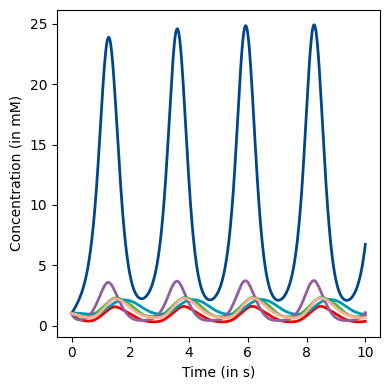

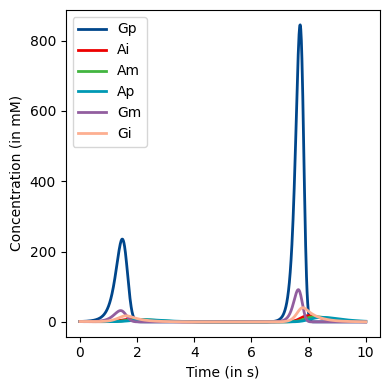

In [ ]:
reaction9_hybrid = pd.read_csv('results/hybrid_model_example/predicted_timeseries/'
                               'garde_predicted_hybrid_timeseries_Production_of_Ammonia_in_middle_layer_using_glutamate.csv',index_col=0)


lancet_colors = ["#00468BFF", "#ED0000FF","#42B540FF","#0099B4FF","#925E9FFF","#FDAF91FF"]
ts = jnp.linspace(0,10,1000)
fig, ax = plt.subplots(figsize=(4,4))
for k, met in enumerate(reaction9_hybrid.columns):
    ax.plot(ts, reaction9_hybrid[met], c=lancet_colors[k], label=met, linewidth=2)

ax.set_xlabel('Time (in s)')
ax.set_ylabel('Concentration (in mM)')
fig.tight_layout()
fig.savefig('figures/hybrid_model_example/reaction9_hybrid_example.png',bbox_inches='tight')
fig.savefig('figures/hybrid_model_example/reaction9_hybrid_example.svg',bbox_inches='tight')
plt.show()


reaction_kinetic_masked = pd.read_csv('results/hybrid_model_example/predicted_timeseries/'
                               'garde_predicted_kinetic_timeseriess_Production_of_Ammonia_in_middle_layer_using_glutamate.csv',index_col=0)


lancet_colors = ["#00468BFF", "#ED0000FF","#42B540FF","#0099B4FF","#925E9FFF","#FDAF91FF"]
ts = jnp.linspace(0,10,1000)
fig, ax = plt.subplots(figsize=(4,4))
for k, met in enumerate(reaction_kinetic_masked.columns):
    ax.plot(ts, reaction_kinetic_masked[met], c=lancet_colors[k], label=met, linewidth=2)
ax.legend()
ax.set_xlabel('Time (in s)')
ax.set_ylabel('Concentration (in mM)')
fig.tight_layout()
fig.savefig('figures/hybrid_model_example/reaction9_kinetic_masked_example.png',bbox_inches='tight')
fig.savefig('figures/hybrid_model_example/reaction9_kinetic_masked_example.svg',bbox_inches='tight')

plt.show()


filepath = ("models/sbml_models/working_models/Garde2020.xml")

# load model from file_path
model = SBMLModel(filepath)

#replaces assignment rules, boundary conditions, etc..

S=model._get_stoichiometric_matrix()

JaxKmodel = model.get_kinetic_model()

ts = jnp.linspace(0,10,1000)


#simulate given the initial conditions defined in the sbml
ys = JaxKmodel(ts=ts,
            y0=model.y0,
            params=model.parameters)
ys=pd.DataFrame(ys,columns=S.index)

fig, ax = plt.subplots(figsize=(4,4))
for k, met in enumerate(ys.columns):
    ax.plot(ts, ys[met], c=lancet_colors[k], label=met, linewidth=2)
# ax.legend()
ax.set_xlabel('Time (in s)')
ax.set_ylabel('Concentration (in mM)')
fig.tight_layout()
fig.savefig('figures/hybrid_model_example/reaction9_kinetic_true_example.png',bbox_inches='tight')
fig.savefig('figures/hybrid_model_example/reaction9_kinetic_true_example.svg',bbox_inches='tight')

plt.show()

